In [ ]:
#===========================Import required libraries==================
import cv2 as cv
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


#==========this libraries for the models =============
from keras.utils.np_utils import normalize 
from tensorflow.keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import regularizers
from tensorflow import keras


#========== This libraries for getting the result of accurcy and confusion matrix of the model =======
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score


#============== Splitting the data into training and validation =========
from sklearn.model_selection import train_test_split



#======================= Avoiding warnings messages===============
import warnings
warnings.filterwarnings('ignore')
#======================= Used for shuffle the data befor spilliting===============
from sklearn.utils import shuffle

#======================= Used for early stopping the models in training===============
from tensorflow.keras.callbacks import EarlyStopping

#============= This library used for saved the model =================
import pickle

In [ ]:

#====================== To access to files in drive=========
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
# ===============================path of the data========================= 
path="/content/drive/MyDrive/Dataset"

#=========================read the csv file that contian the images name and its label
train=pd.read_csv(path+ '/label.csv')
#store the images name in (image_name )
image_name=train['file_name'].to_list()
#store the labels of the images in (label_name ), which tell us the type of tumors 

label_name=train['label'].to_list()


train_labels = [] 

#len(label_name)--> number of the data set that we have 
#this for loop will check on all the labal name list 
#and it will seprate the data into two class 0 and 1
#0 means (no_tumor), 1 means (have tumor) this will store in train_labels 

for i in range(len(label_name)):
    if label_name[i] == 'no_tumor':
        train_labels.append(0)
    else:
        train_labels.append(1)

    
#Print an examples for the two classes 
        
print("this image is", image_name[0] , label_name[0], "in Class: ", train_labels[0])
print("this image is", image_name[1] , label_name[1], "in Class: ", train_labels[1])


this image is IMAGE_0000.jpg meningioma_tumor in Class:  1
this image is IMAGE_0001.jpg no_tumor in Class:  0


this image is IMAGE_0002.jpg meningioma_tumor in Class:  1


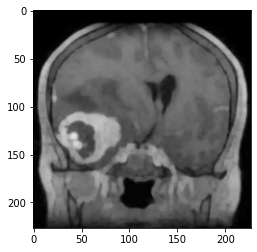

In [ ]:
train_img = []  # X trian 
img_size= 227    # for using in image resize 

# =========== Reading the preproccing images and resize it then convert it to an array ======
# =========== change the file path as its apear in your computer ================
for i in range(len(image_name)):
    train_img.append(np.array(cv.resize(cv.imread(path+"/New_images/"+image_name[i]),(img_size,img_size))))


#train_img = np.array(train_img)

#Example of one image after resizing 
print("this image is", image_name[2] , label_name[2], "in Class: ", train_labels[2])
plt.imshow(train_img[2])



In [ ]:
# here we can see how many data set in each class 
train_img=np.array(train_img)
train_labels=np.array(train_labels)

In [ ]:
# ================== Shuffel and split the data  ===============

train_img,train_labels = shuffle(train_img,train_labels)
X_train, x_test, y_train, y_test = train_test_split(train_img, train_labels, test_size=0.2, random_state=42)

In [ ]:
# ================== Check the shape of the data ===============
print("X Train: ", X_train.shape)
print("Y Train: ", y_train.shape)

print("X Test: ", x_test.shape)
print("Y Test: ", y_test.shape)

X Train:  (2400, 227, 227, 3)
Y Train:  (2400,)
X Test:  (600, 227, 227, 3)
Y Test:  (600,)


In [ ]:
# ================== Normalize the images ===============
x_train=normalize(X_train, axis=1)

x_test=normalize(x_test, axis=1)

#================= summarize dataset shape
#print('Train', x_train.shape, y_train.shape)
#print('Test', (x_test.shape, y_test.shape))
#================== summarize pixel values
#print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
#print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

In [ ]:
#=============================== Model Building====================== 

model= Sequential()
#===============================first layer -====================
model.add(Conv2D(128, (6,6), input_shape=(img_size, img_size,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))


#==============================Second layer ========================
model.add(Conv2D(96, (6,6), kernel_initializer='he_uniform', strides=[2,2]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [ ]:
#=================================== Compiling the model =================
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'] )
#=================================== Print the model Summary =============
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     13952     
                                                                 
 activation_8 (Activation)   (None, 222, 222, 128)     0         
                                                                 
 batch_normalization_2 (Batc  (None, 222, 222, 128)    512       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 53, 53, 96)        442464    
                                                                 
 activation_9 (Activation)   (None, 53, 53, 96)       

In [ ]:
#================================= Define the early stopping critirial ===============
custom_early_stopping = EarlyStopping(monitor='val_loss', patience=15 ,min_delta=0.001, mode='max')
#================================= Fitting the model ================================
history = model.fit(x_train, y_train, batch_size=32, verbose=1, epochs=100, validation_data=(x_test, y_test), callbacks=[custom_early_stopping])

Epoch 1/100
75/75 [==============================] - 8s 98ms/step - loss: 0.7989 - accuracy: 0.8592 - val_loss: 0.6882 - val_accuracy: 0.5083
Epoch 2/100
75/75 [==============================] - 7s 93ms/step - loss: 0.1704 - accuracy: 0.9250 - val_loss: 0.6683 - val_accuracy: 0.8500
Epoch 3/100
75/75 [==============================] - 7s 93ms/step - loss: 0.1060 - accuracy: 0.9563 - val_loss: 0.6793 - val_accuracy: 0.8500
Epoch 4/100
75/75 [==============================] - 7s 93ms/step - loss: 0.0569 - accuracy: 0.9754 - val_loss: 0.6367 - val_accuracy: 0.8767
Epoch 5/100
75/75 [==============================] - 7s 93ms/step - loss: 0.0262 - accuracy: 0.9908 - val_loss: 0.5333 - val_accuracy: 0.8967
Epoch 6/100
75/75 [==============================] - 7s 92ms/step - loss: 0.0170 - accuracy: 0.9933 - val_loss: 0.2385 - val_accuracy: 0.9350
Epoch 7/100
75/75 [==============================] - 7s 93ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.1447 - val_accuracy: 0.9533
Epoch 

In [ ]:
#============================= printing the evaluaing of the validation data ==================
A=model.evaluate(x_test, y_test)


19/19 [==============================] - 1s 26ms/step - loss: 0.2366 - accuracy: 0.9700


In [ ]:
#============================ Pridecting the validation data===============
y_pred=model.predict(x_test) 
#=========================== Print the Confusion matrix data============
cm = confusion_matrix(y_test, y_pred.round())
print(cm)


#===========================printing the Classificarion Report================ 
print(classification_report(y_test,y_pred.round()))

precision = precision_score(y_test,y_pred.round(), average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred.round(), average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test,y_pred.round(), average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU

print ('IoU:', jaccard_score(y_test,y_pred.round(), average='micro'))

print("Accuracy_test:",accuracy_score(y_test,y_pred.round()))
#====
y_Tra= model.predict(x_train)

print("Accuracy_train:",accuracy_score(y_train, y_Tra.round()))
#=====

[[ 84   6]
 [ 12 498]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        90
           1       0.99      0.98      0.98       510

    accuracy                           0.97       600
   macro avg       0.93      0.95      0.94       600
weighted avg       0.97      0.97      0.97       600

Precision: 0.971131
Recall: 0.970000
F1 score: 0.970395
IoU: 0.941747572815534
Accuracy_test: 0.97
Accuracy_train: 0.9991666666666666


In [ ]:
# Now, this code will print the confusion matrix of our results
# with normlization, and without normilazation 
class_names = ['No Tumor', 'Tumor']

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without Normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion Matrix, without Normalization


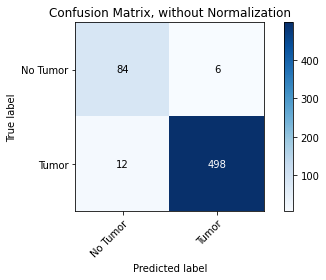

In [ ]:
#======Print the matrix============

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 14}

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred.round(), classes=class_names,
                      title='Confusion Matrix, without Normalization')
plt.savefig('confusion matrix22'+'Brain Tumor1'+'.png')
plt.show()

# Plot normalized confusion matrix
#plot_confusion_matrix(y_test, y_pred.round(), classes=class_names, normalize=True,title='Normalized Confusion Matrix')
#plt.savefig('Confusion Matrix'+'RF' +'.png')
#plt.show()

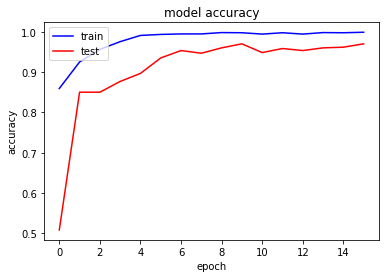

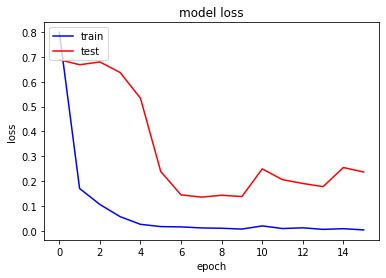

In [ ]:
#======= Plotting the learning curve===============

# list all data in history
#print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'],color='blue')
plt.plot(history.history['val_accuracy'],color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()
# summarize history for loss
plt.plot(history.history['loss'],color='blue')
plt.plot(history.history['val_loss'],color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#====== Save the model===== 

filename = 'DeepLearning_model_Task1.sav'
pickle.dump(model, open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://336bad36-62d7-4805-a751-9da27478a003/assets
